In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing,decomposition
from scipy import stats
import json
import ast
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

# Data Loading

In [4]:
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\Payroll Fraud Detection\1. Data Cleaning\Ghost\Full Data Cleaned\ZY_Ghost_full_V3.csv")
df = df.drop(df.columns[0], axis=1)

df['DATSOR'] = pd.to_datetime(df['DATSOR'],format='ISO8601')
df['DATENT'] = pd.to_datetime(df['DATENT'],format='ISO8601')

df['DATDEB'] = pd.to_datetime(df['DATDEB'],format='ISO8601')
df['DATFIN'] = pd.to_datetime(df['DATFIN'],format='ISO8601')

df['PHYSOR'] = pd.to_datetime(df['PHYSOR'],format='ISO8601')
df['DTECHE'] = pd.to_datetime(df['DTECHE'],format='ISO8601')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_120440\3136527978.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\1. Data Cleaning\Ghost\ZY_Ghost_full_noNan_NEW.csv")


In [13]:
df0 = df

In [14]:
n,p = df0.shape

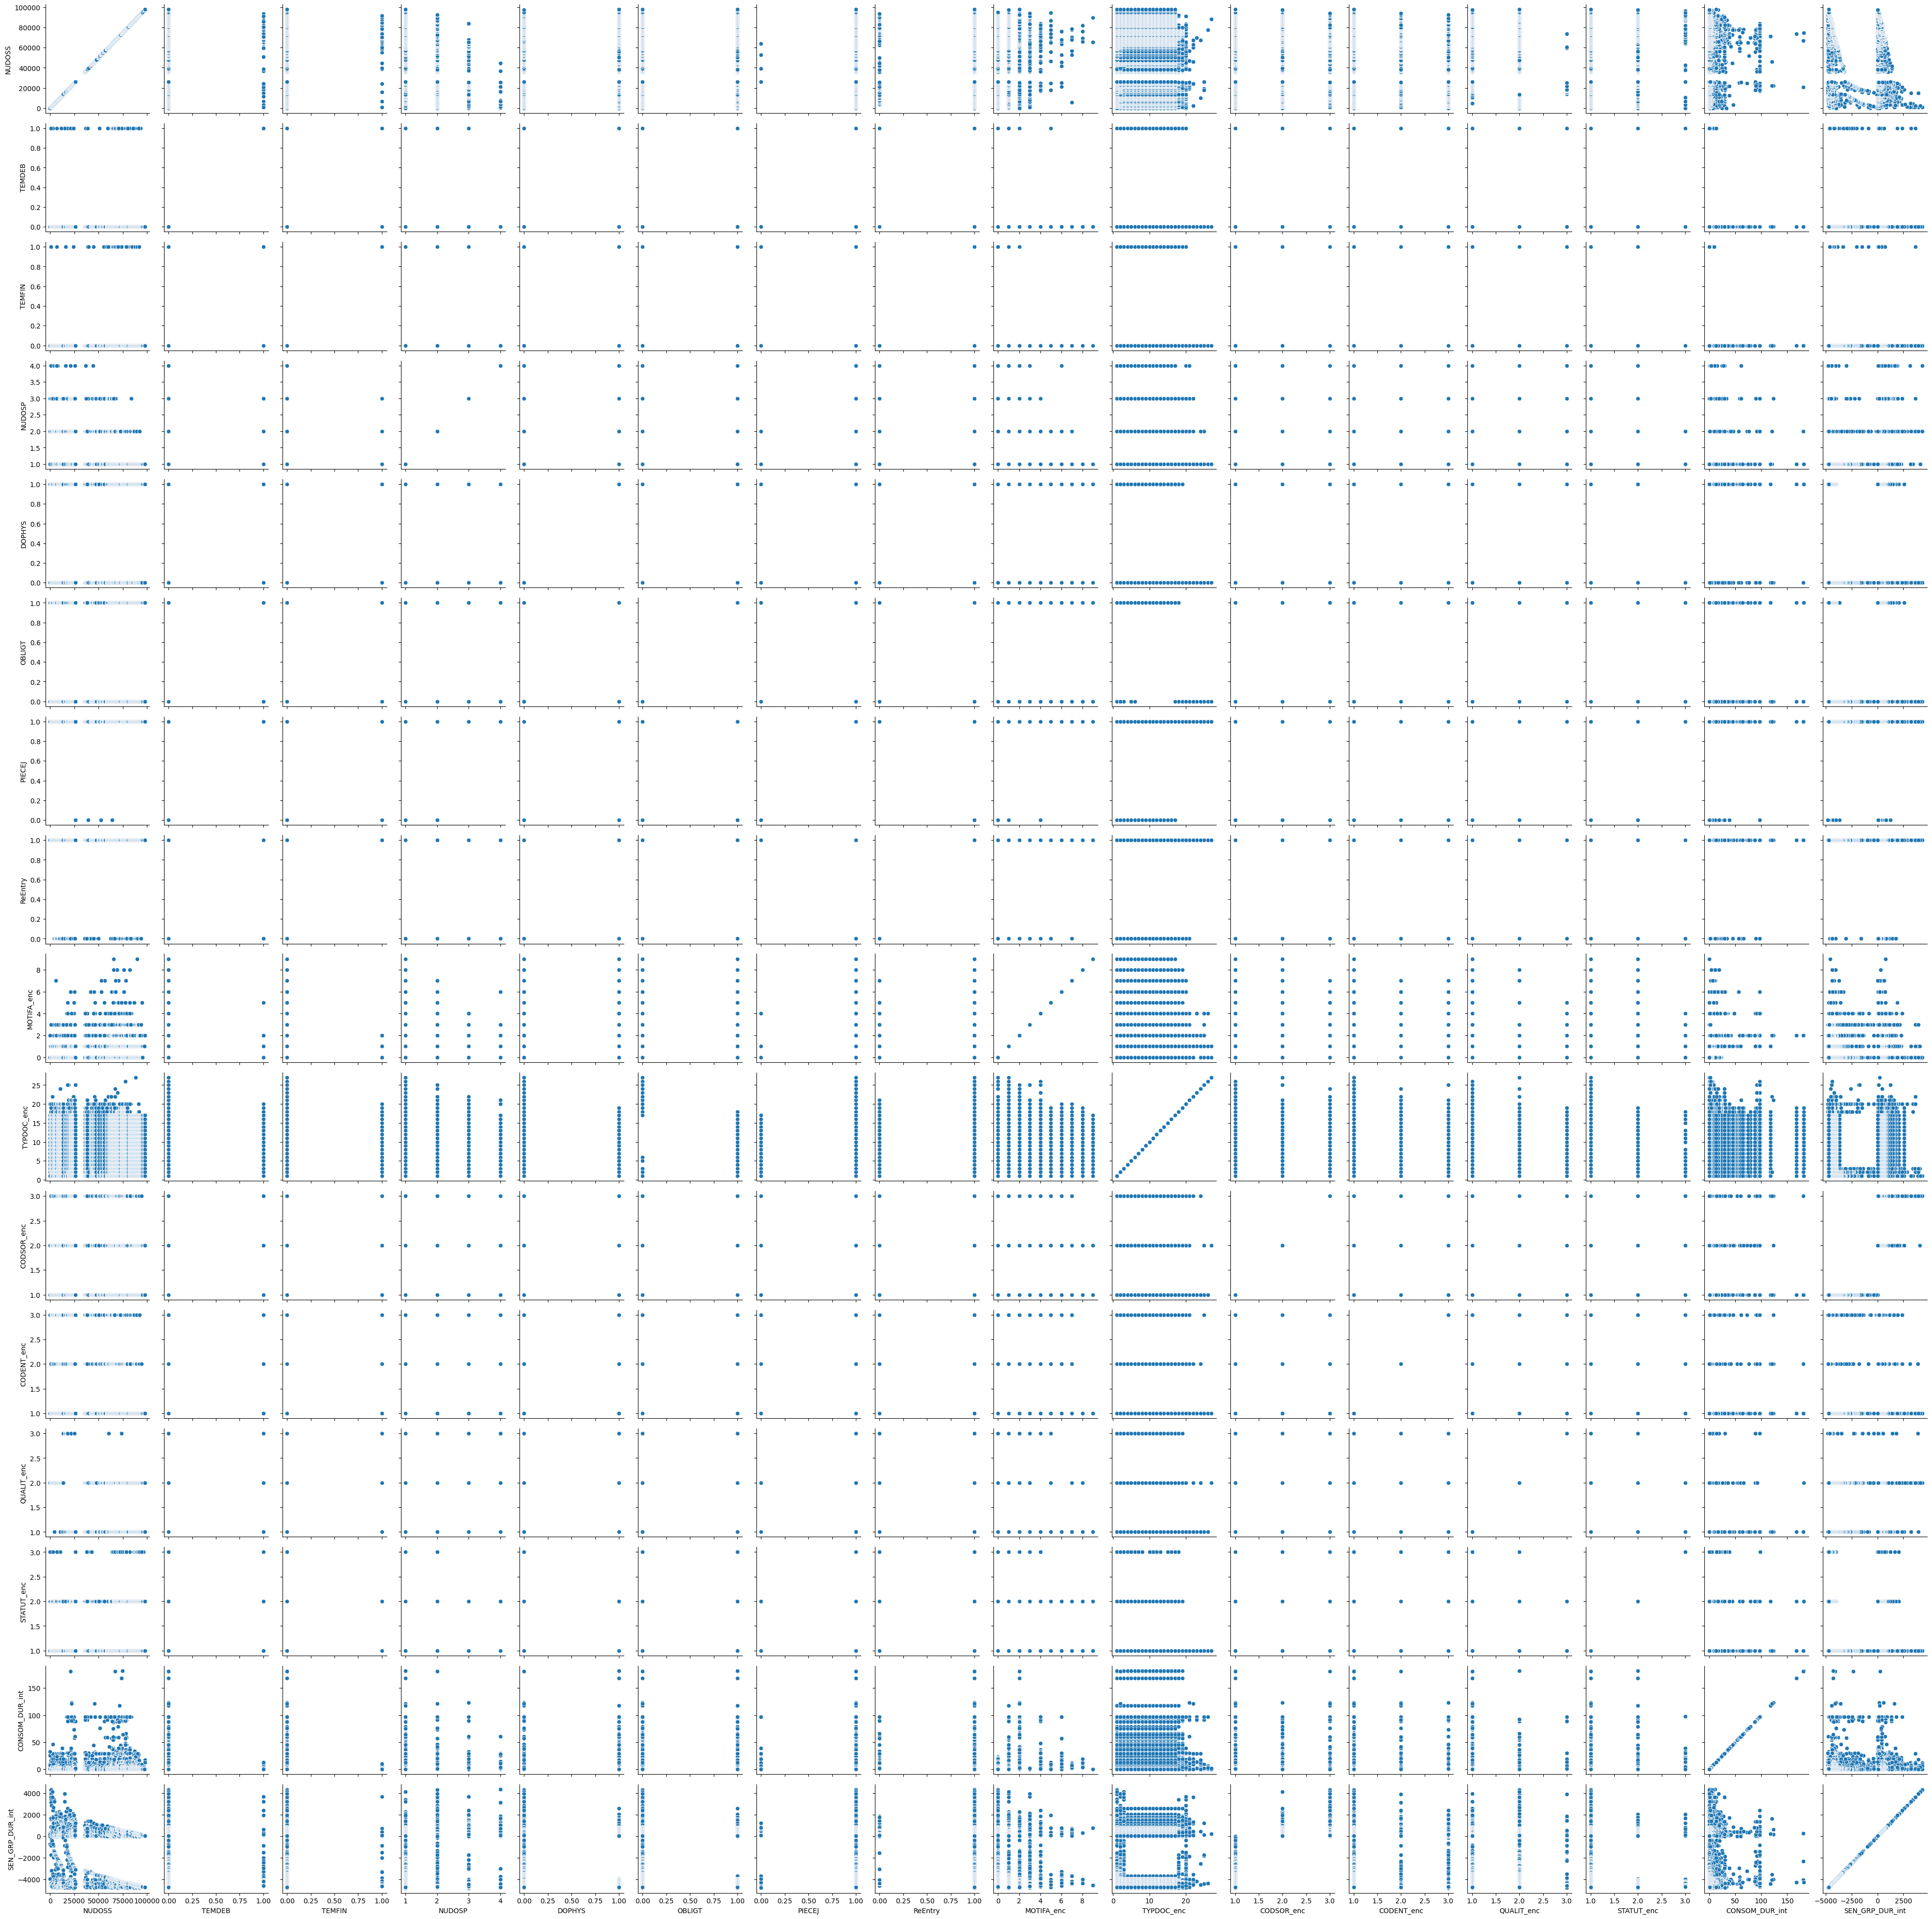

In [19]:
g = sns.PairGrid(df0)
g.map(sns.scatterplot)

In [20]:
cols_all = df0.columns

cols_Date = []
cols_numeric = []
cols_obj = []
cols_bool = []
for col_name in cols_all:
    col_type = df0[col_name].dtype
    if col_type == 'datetime64[ns]':
        cols_Date.append(col_name)
    elif col_type in ['int64', 'int32', 'float64','float32']:
        cols_numeric.append(col_name)
    elif col_type == 'object':
        cols_obj.append(col_name)
    elif col_type == 'bool':
        cols_bool.append(col_name)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768386 entries, 0 to 768385
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   NUDOSS           768386 non-null  int64         
 1   MATCLE           737140 non-null  object        
 2   QUALIT           768386 non-null  object        
 3   DATDEB           768386 non-null  datetime64[ns]
 4   DATFIN           768386 non-null  datetime64[ns]
 5   TEMDEB           768386 non-null  bool          
 6   TEMFIN           768386 non-null  bool          
 7   NUDOSP           768386 non-null  int64         
 8   DOPHYS           768386 non-null  bool          
 9   OBLIGT           768386 non-null  bool          
 10  STATUT           768386 non-null  object        
 11  PIECEJ           768386 non-null  bool          
 12  DTECHE           768386 non-null  datetime64[ns]
 13  ORIGIN           768386 non-null  object        
 14  DATENT           768

In [27]:
cols_ids = ['NUDOSS','NUDOSP']
cols_num_no_ids = [col for col in cols_numeric if col not in cols_ids]

In [29]:
df = df0[cols_num_no_ids + cols_Date]
df2 = df0[cols_num_no_ids + cols_Date + cols_bool]
df1 = df0[cols_num_no_ids]

list_en = ['MOTIFA_enc','TYPDOC_enc','CODSOR_enc','CODENT_enc','QUALIT_enc','STATUT_enc']
df3 = df1[list_en]

## Corr matrix

In [31]:
corr_matrix = df1.corr()

## Normalized df : Numerals & Dates

In [34]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()
# sc = StandardScaler()

# Fit and transform the data
df[cols_num_no_ids ] = scaler.fit_transform(df[cols_num_no_ids])


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_34740\3326511673.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols_num_no_ids ] = scaler.fit_transform(df[cols_num_no_ids])


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_34740\3676560637.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


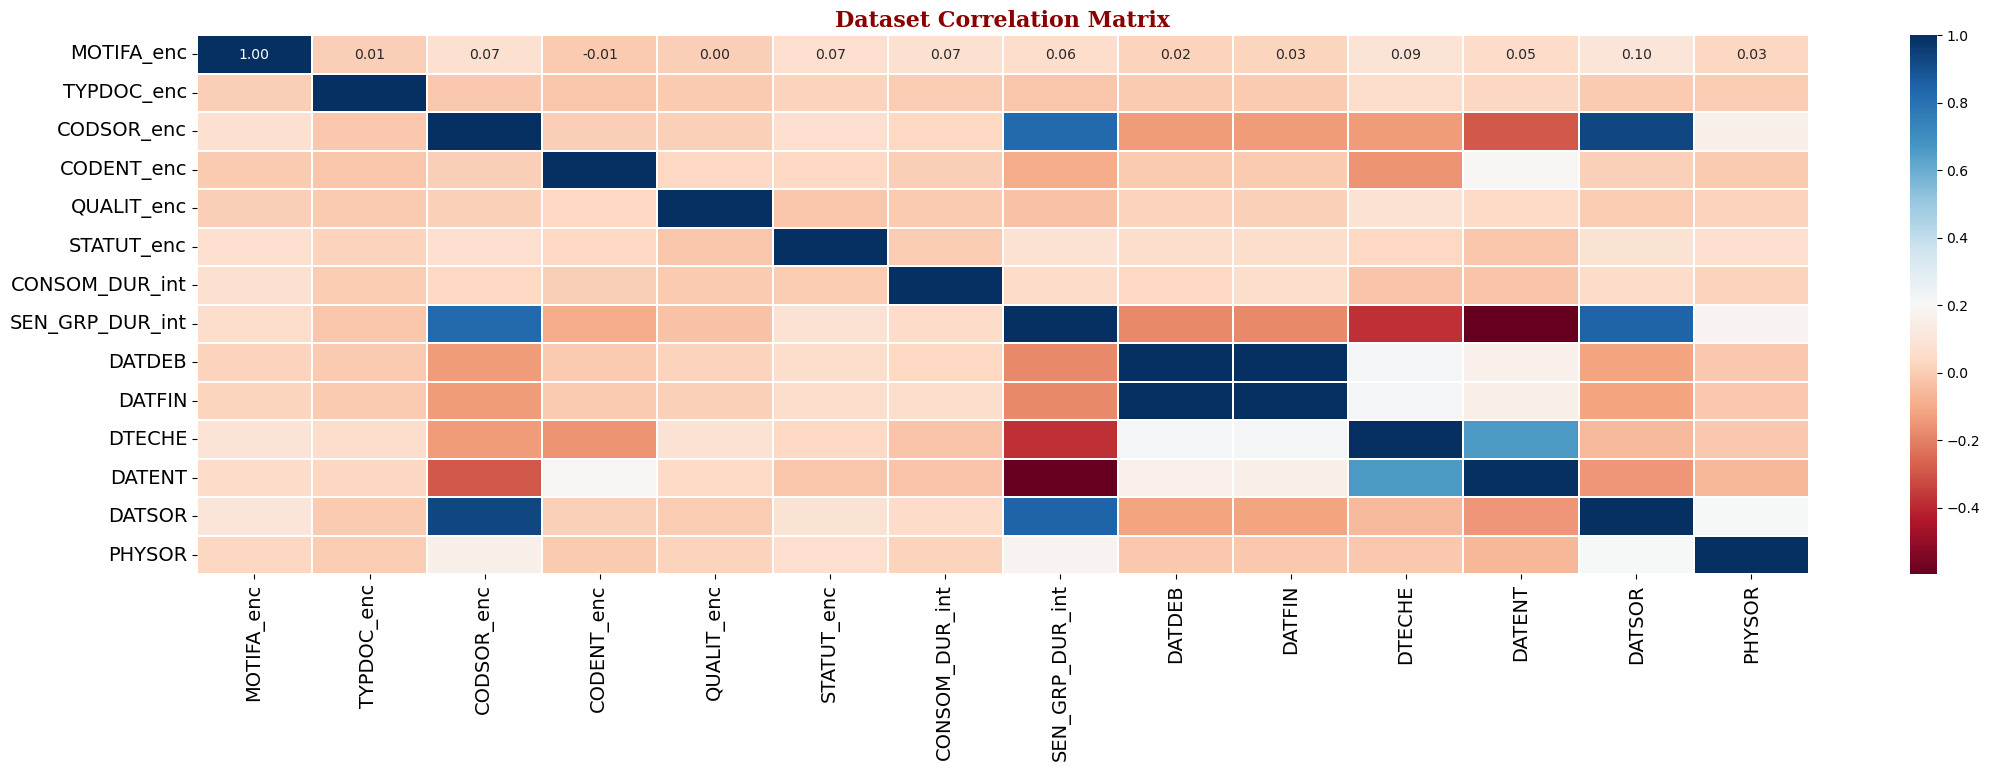

In [35]:
# plot correlation matrix heatmap
axtitle_dict = {'family': 'serif','color':  'darkred','weight': 'bold','size': 16}

fig, ax = plt.subplots(figsize=[26,7])
sns.heatmap(df.corr('spearman'), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap='RdBu') #kind of correlation->  ‘pearson’, ‘kendall’, ‘spearman’
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Dataset Correlation Matrix', fontdict=axtitle_dict)
plt.savefig('correlation_matrix_GHOST_num_date.png')
fig.show()

## Normalized df2 : Numerals + dates + bool 

In [36]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data
df2[cols_num_no_ids] = scaler.fit_transform(df2[cols_num_no_ids])


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_34740\397031154.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[cols_num_no_ids] = scaler.fit_transform(df2[cols_num_no_ids])


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_34740\2760087465.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


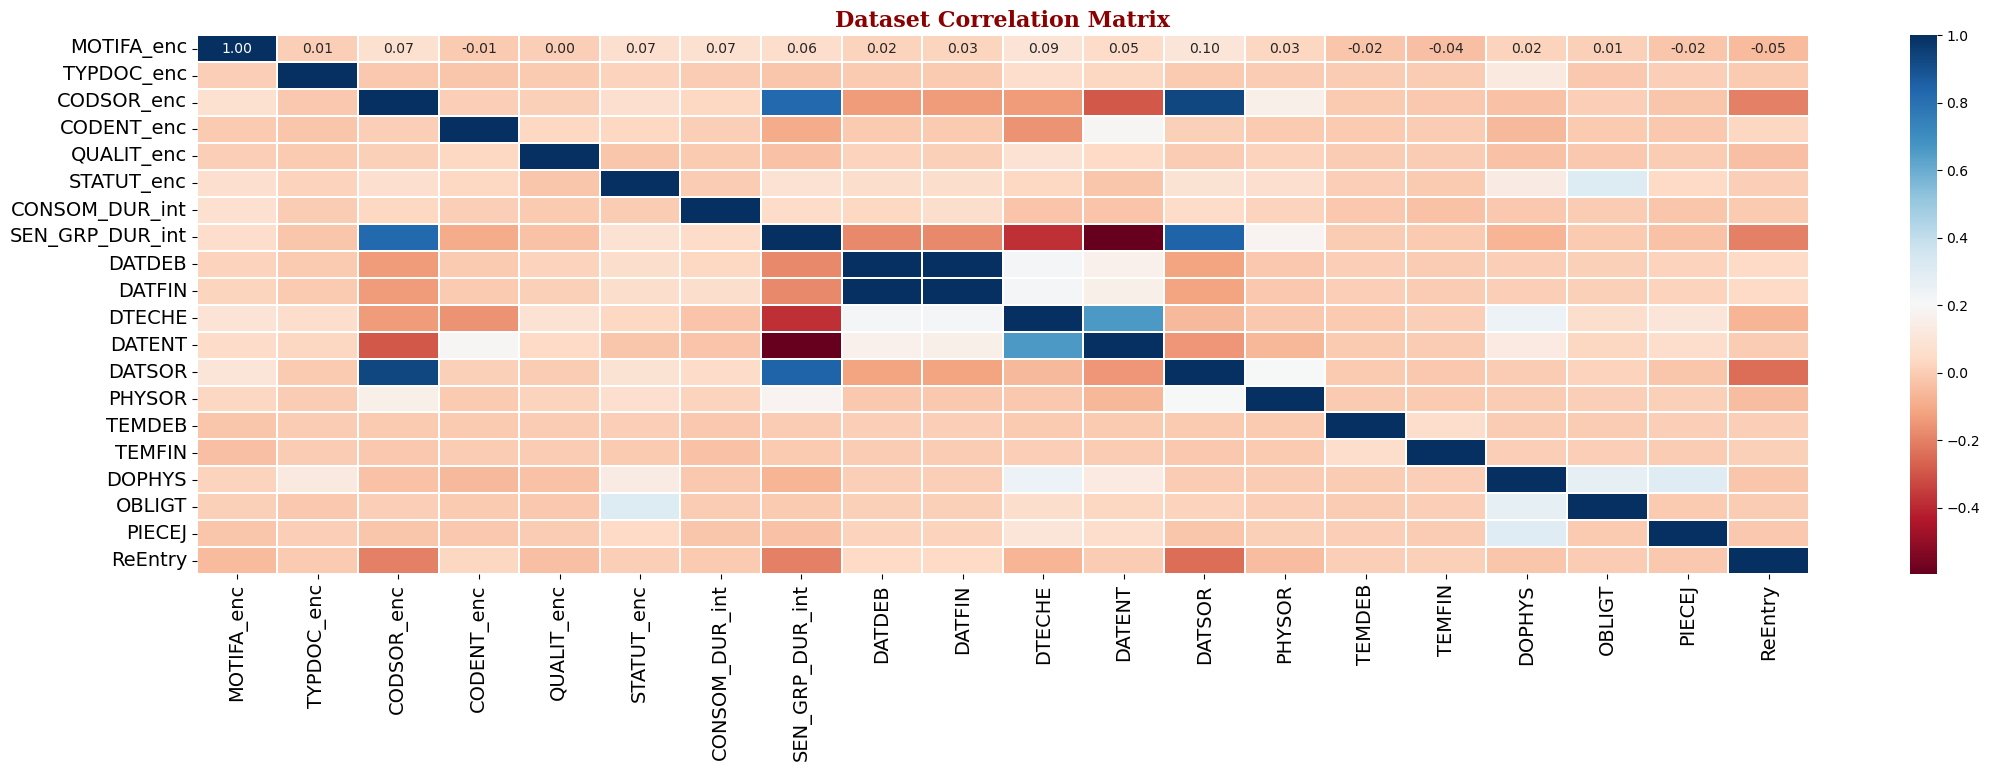

In [37]:
# plot correlation matrix heatmap
axtitle_dict = {'family': 'serif','color':  'darkred','weight': 'bold','size': 16}

fig, ax = plt.subplots(figsize=[26,7])
sns.heatmap(df2.corr('spearman'), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap='RdBu') #kind of correlation->  ‘pearson’, ‘kendall’, ‘spearman’
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Dataset Correlation Matrix', fontdict=axtitle_dict)
plt.savefig('correlation_matrix_GHOST_2.png')
fig.show()

## Normalized df1 : Numerals 

In [38]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data
df1[cols_num_no_ids] = scaler.fit_transform(df1[cols_num_no_ids])


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_34740\1336190996.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[cols_num_no_ids] = scaler.fit_transform(df1[cols_num_no_ids])


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_34740\3492249341.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


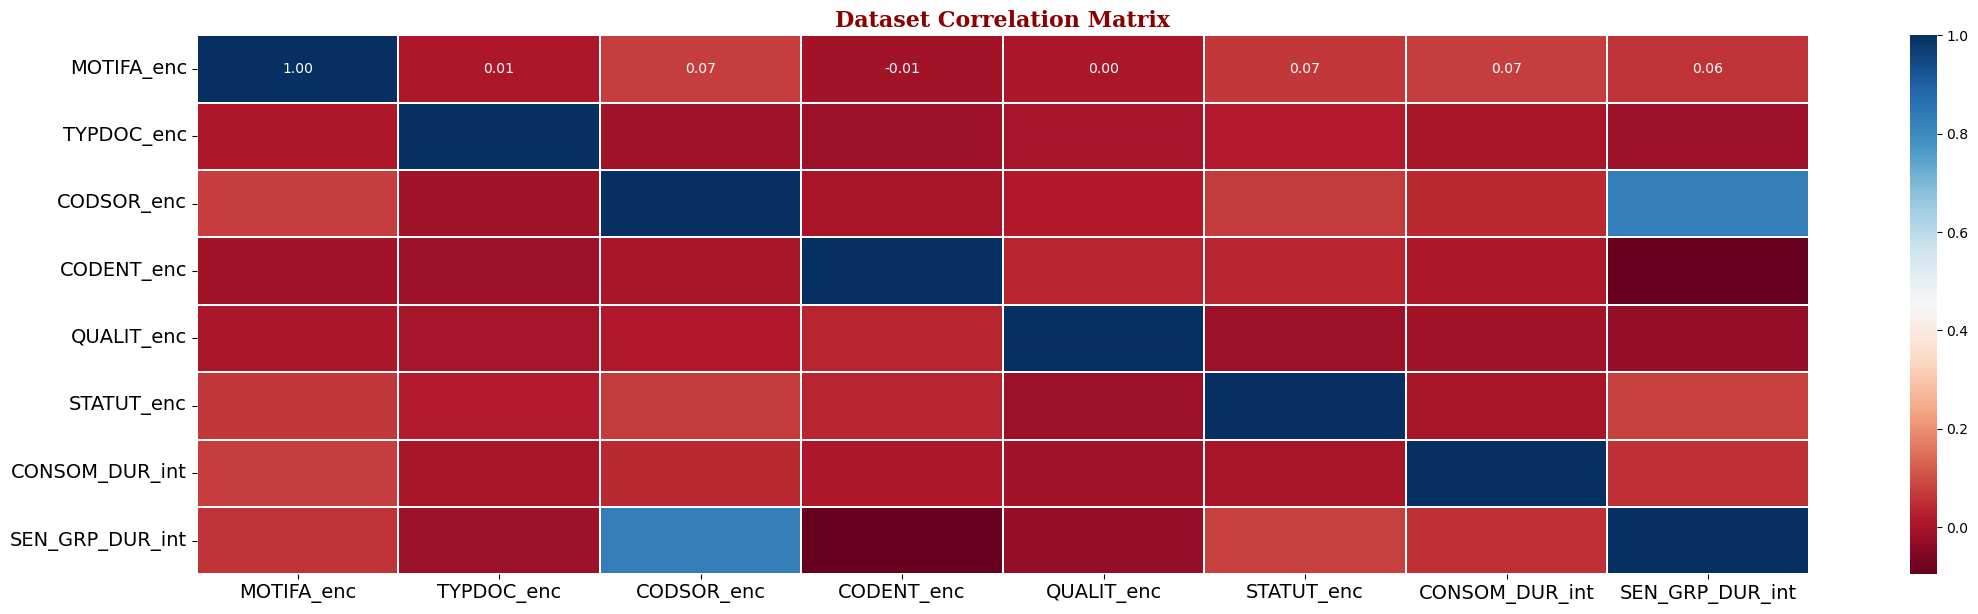

In [39]:
# plot correlation matrix heatmap
axtitle_dict = {'family': 'serif','color':  'darkred','weight': 'bold','size': 16}

fig, ax = plt.subplots(figsize=[26,7])
sns.heatmap(df1.corr('spearman'), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap='RdBu') #kind of correlation->  ‘pearson’, ‘kendall’, ‘spearman’
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Dataset Correlation Matrix', fontdict=axtitle_dict)
plt.savefig('correlation_matrix_GHOST.png')
fig.show()

## Normalized df3 : encoded Numerals

In [40]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data
df3[list_en] = scaler.fit_transform(df3[list_en])


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_34740\3271902863.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[list_en] = scaler.fit_transform(df3[list_en])


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_34740\1188952423.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


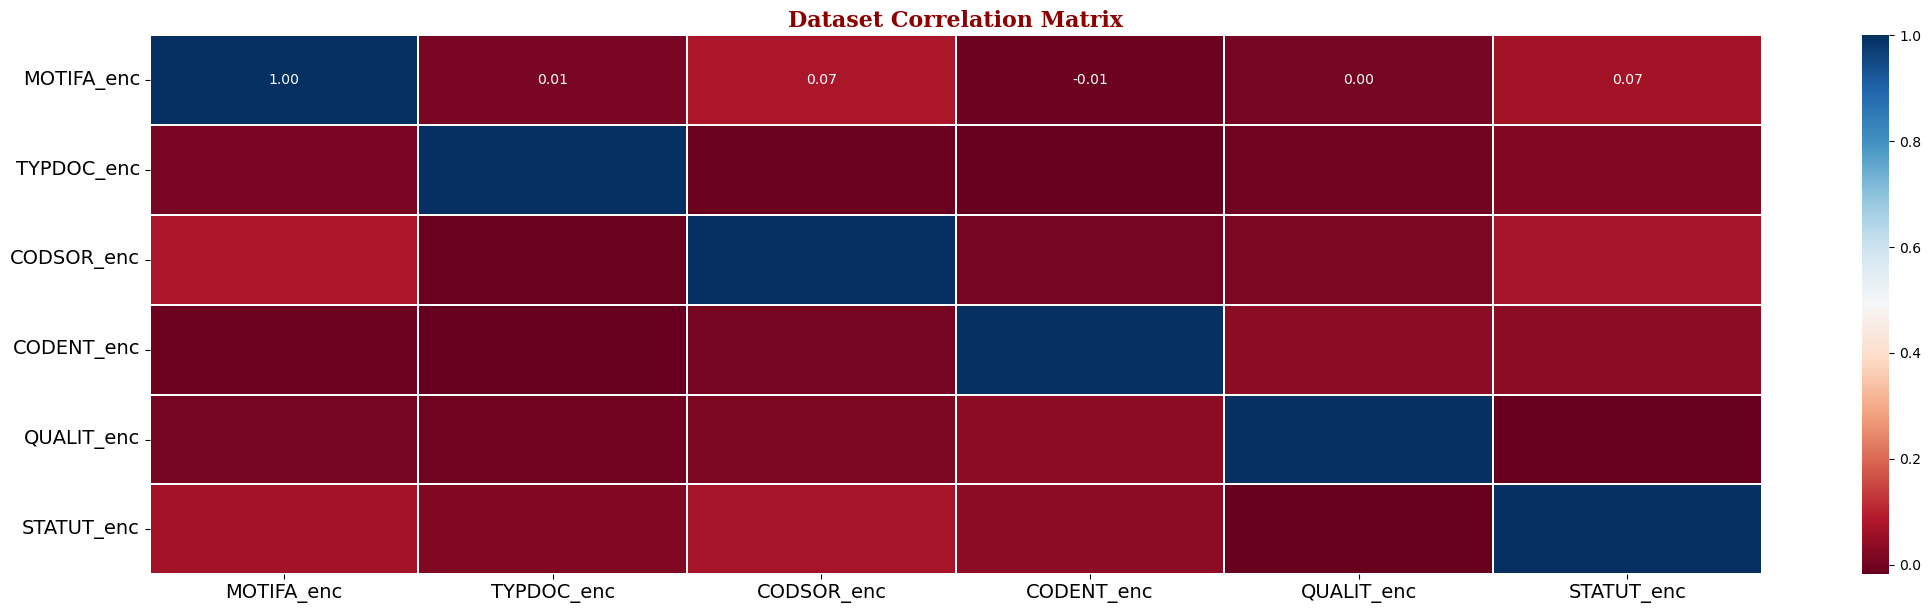

In [41]:
# plot correlation matrix heatmap
axtitle_dict = {'family': 'serif','color':  'darkred','weight': 'bold','size': 16}

fig, ax = plt.subplots(figsize=[26,7])
sns.heatmap(df3.corr('spearman'), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap='RdBu') #kind of correlation->  ‘pearson’, ‘kendall’, ‘spearman’
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Dataset Correlation Matrix', fontdict=axtitle_dict)
plt.savefig('correlation_matrix_GHOST_3.png')
fig.show()

In [44]:
data_cr = preprocessing.scale(df1[cols_num_no_ids])
data_cr_3 = preprocessing.scale(df3[list_en])

In [45]:
data_cr

array([[-0.83990329, -1.3886612 ,  2.30045651, ..., -0.72655284,
        -0.35614121,  2.85222838],
       [-0.83990329, -1.3886612 , -0.7321248 , ..., -0.72655284,
        -0.35614121,  0.71918504],
       [-0.83990329,  1.60281199,  2.30045651, ..., -0.72655284,
         0.63623222,  1.83768918],
       ...,
       [ 2.19784643,  0.85494369, -0.7321248 , ..., -0.72655284,
         1.79400121, -0.9715668 ],
       [ 2.19784643,  0.66797662, -0.7321248 , ..., -0.72655284,
         1.79400121, -0.9715668 ],
       [ 2.19784643,  0.48100954, -0.7321248 , ..., -0.72655284,
         1.79400121, -0.9715668 ]])

In [46]:
data_cr_3

array([[-0.83990329, -1.3886612 ,  2.30045651, -0.44008964,  1.0236596 ,
        -0.72655284],
       [-0.83990329, -1.3886612 , -0.7321248 ,  1.1986891 ,  1.0236596 ,
        -0.72655284],
       [-0.83990329,  1.60281199,  2.30045651, -0.44008964,  1.0236596 ,
        -0.72655284],
       ...,
       [ 2.19784643,  0.85494369, -0.7321248 , -0.44008964,  1.0236596 ,
        -0.72655284],
       [ 2.19784643,  0.66797662, -0.7321248 , -0.44008964,  1.0236596 ,
        -0.72655284],
       [ 2.19784643,  0.48100954, -0.7321248 , -0.44008964,  1.0236596 ,
        -0.72655284]])

In [47]:
print (f' Mean : {np.mean(data_cr,axis=0)} \n\n Std : {np.std(data_cr,axis=0)}')

 Mean : [-3.69888434e-17 -5.04379869e-16  3.84683971e-17  1.42037159e-17
  1.01127498e-16  7.39776868e-18 -5.57791759e-17  3.07747177e-16] 

 Std : [1. 1. 1. 1. 1. 1. 1. 1.]


In [48]:
print (f' Mean : {np.mean(data_cr_3,axis=0)} \n\n Std : {np.std(data_cr_3,axis=0)}')

 Mean : [-3.69888434e-17 -5.04379869e-16  3.84683971e-17  1.42037159e-17
  1.01127498e-16  7.39776868e-18] 

 Std : [1. 1. 1. 1. 1. 1.]


## ACP

### df1

In [49]:
PCA = decomposition.PCA(n_components= len(df1.columns))
PCA.fit(df1)

PCA(n_components=8)

In [50]:
n_compo = PCA.n_components_
eigval = PCA.explained_variance_

In [51]:
PCA.explained_variance_ratio_

array([0.37845973, 0.21693995, 0.14563818, 0.13025239, 0.09772075,
       0.01634926, 0.01228359, 0.00235616])

In [52]:
eigval.shape

(8,)

### df3

In [53]:
PCA_3 = decomposition.PCA(n_components= len(df3.columns))
PCA_3.fit(df3)

PCA(n_components=6)

In [54]:
n_compo_3 = PCA_3.n_components_
eigval_3 = PCA_3.explained_variance_

In [55]:
PCA_3.explained_variance_ratio_

array([0.29516234, 0.25350095, 0.17031822, 0.15232811, 0.1142802 ,
       0.01441017])

In [56]:
eigval_3.shape

(6,)

## Visualization

### df1

### a. Scree plot

In [57]:
n,p = df1.shape

In [58]:
p

8

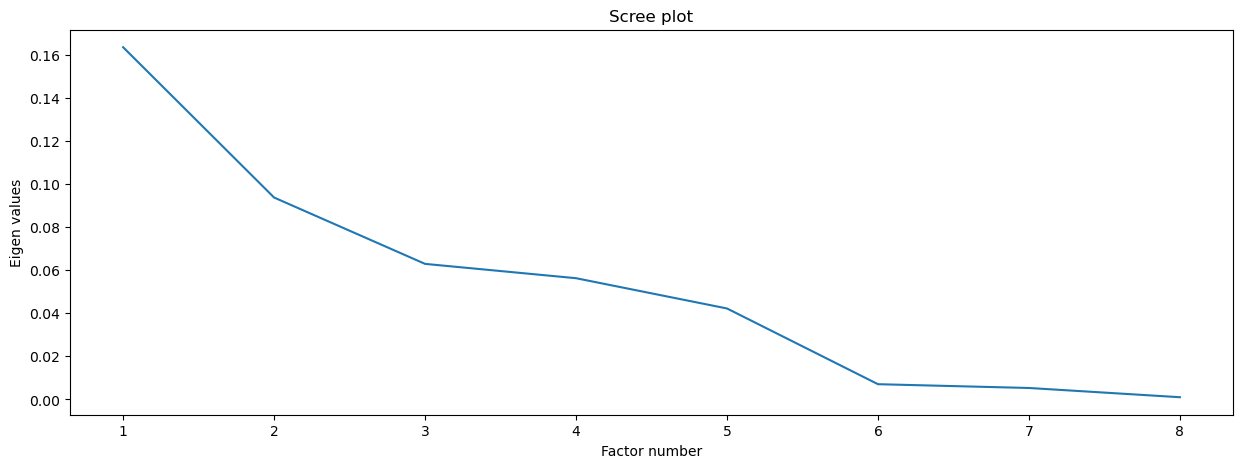

In [60]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(1,n_compo+1),eigval)

plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.savefig('Scree_plot_GHOST_11.png')

plt.show()

### b. Cumul Explained variance 

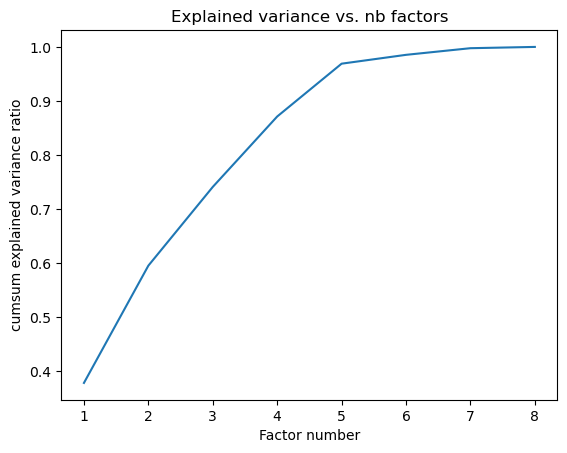

In [61]:
plt.plot(np.arange(1,n_compo+1),np.cumsum(PCA.explained_variance_ratio_))

plt.title("Explained variance vs. nb factors")
plt.ylabel("cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.savefig('Cumul_plot_GHOST_11.png')
#plt.style.context('seaborn-whitegrid')
#plt.axhline(y=80, color='r', linestyle='--')
plt.show()

**==> Could be represented by 8 Features.**

In [62]:
corvar = np.zeros((n_compo,n_compo)) 
for k in range(n_compo):
    corvar[:,k] = PCA.components_[k,:] * np.sqrt(eigval)[k]
    
corvar.shape

(8, 8)

In [63]:
corvar

array([[ 4.11503410e-03,  7.23512721e-04, -1.26594699e-03,
         3.60321706e-03,  1.61914543e-04,  1.91077142e-02,
         7.02520367e-02, -4.35071081e-03],
       [-4.40363268e-03, -4.80305763e-03, -4.38344116e-03,
         1.25195318e-02,  2.05181442e-01, -1.44622896e-05,
        -1.09217885e-04,  1.02696641e-05],
       [ 3.25686732e-01, -2.95385041e-04,  1.57511594e-03,
        -1.51341947e-02,  2.53629196e-03, -4.83681813e-02,
         9.33830823e-03, -5.04889623e-06],
       [ 1.12370718e-03,  3.03316011e-01, -1.76876849e-02,
        -2.74856739e-02,  4.20843495e-03,  1.15504104e-03,
        -3.26939964e-04, -5.18434319e-05],
       [ 3.55486239e-03,  2.88729804e-02,  2.43825718e-01,
         5.12659799e-02,  1.47278611e-03, -4.35754838e-05,
         1.75045970e-04,  2.09221503e-04],
       [ 2.21199915e-02,  3.01294658e-02, -5.63031930e-02,
         2.29184389e-01, -1.08622515e-02, -3.03968126e-03,
        -6.14319935e-04,  4.68303571e-05],
       [ 6.33744019e-04,  3.614977

In [65]:
pd.DataFrame({'id':df1.columns, 'COR_1':corvar[:,0], 'COR_2':corvar[:,1], 'COR_3':corvar[:,2],
              'COR_4':corvar[:,3],'COR_5':corvar[:,4],'COR_6':corvar[:,5],'COR_7':corvar[:,6],
             'COR_8':corvar[:,7]
             })

,id,COR_1,COR_2,COR_3,COR_4,COR_5,COR_6,COR_7,COR_8
0,MOTIFA_enc,0.004115,0.000724,-0.001266,0.003603,0.000162,0.019108,0.070252,-0.004351
1,TYPDOC_enc,-0.004404,-0.004803,-0.004383,0.012520,0.205181,-0.000014,-0.000109,0.000010
2,CODSOR_enc,0.325687,-0.000295,0.001575,-0.015134,0.002536,-0.048368,0.009338,-0.000005
3,CODENT_enc,0.001124,0.303316,-0.017688,-0.027486,0.004208,0.001155,-0.000327,-0.000052
4,QUALIT_enc,0.003555,0.028873,0.243826,0.051266,0.001473,-0.000044,0.000175,0.000209
5,STATUT_enc,0.022120,0.030129,-0.056303,0.229184,-0.010862,-0.003040,-0.000614,0.000047
6,CONSOM_DUR_int,0.000634,0.000361,-0.001732,-0.000235,-0.000030,0.002647,0.009664,0.031617
7,SEN_GRP_DUR_int,0.238745,-0.004348,-0.000534,-0.001053,0.001287,0.065922,-0.013922,-0.000009


### df3

### a. Scree plot

In [66]:
n,p = df3.shape

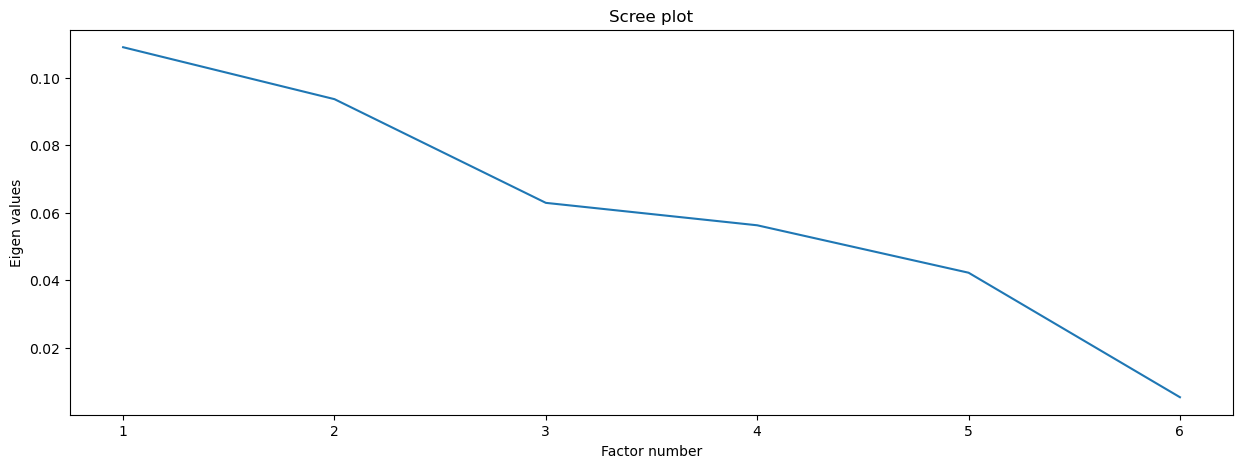

In [67]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(1,n_compo_3+1),eigval_3)

plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.savefig('Scree_plot_Ghost_3.png')

plt.show()

### b. Cumul Explained variance 

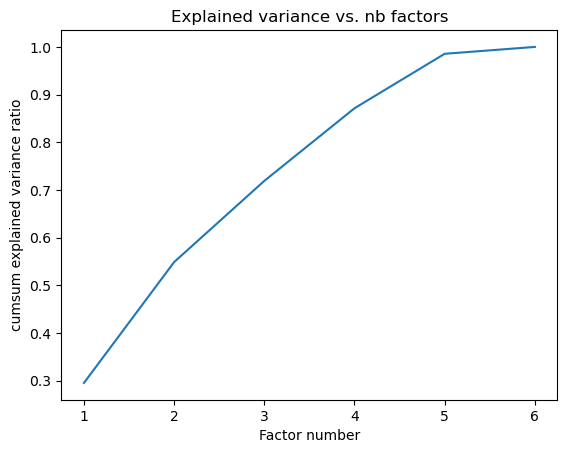

In [68]:
plt.plot(np.arange(1,n_compo_3+1),np.cumsum(PCA_3.explained_variance_ratio_))

plt.title("Explained variance vs. nb factors")
plt.ylabel("cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.savefig('Scree_plot_GHOST_33.png')

plt.show()

#### ==> 4 Variables are enough to represent 80% of the data

In [69]:
corvar_3 = np.zeros((n_compo_3,n_compo_3)) 
for k in range(n_compo_3):
    corvar_3[:,k] = PCA_3.components_[k,:] * np.sqrt(eigval_3)[k]
    
corvar_3.shape

(6, 6)

In [70]:
corvar_3

array([[ 3.45760116e-03,  5.24812471e-04, -1.25324298e-03,
         3.60065508e-03,  1.59403445e-04,  7.29702673e-02],
       [-5.49841978e-03, -4.42900608e-03, -4.36321017e-03,
         1.25710391e-02,  2.05160723e-01, -1.07003068e-04],
       [ 3.28615266e-01, -2.13432004e-02,  7.08994912e-04,
        -1.66224360e-02,  3.97363747e-03, -6.73940934e-04],
       [ 2.01331056e-02,  3.02660273e-01, -1.76440673e-02,
        -2.74245194e-02,  4.16303224e-03, -6.90821012e-05],
       [ 6.22996785e-03,  2.84916141e-02,  2.43808210e-01,
         5.13082609e-02,  1.46281307e-03,  8.83124359e-05],
       [ 2.51077742e-02,  2.85386220e-02, -5.64100794e-02,
         2.29074442e-01, -1.08021266e-02, -1.21804887e-03]])

In [71]:
pd.DataFrame({'id':df3.columns, 'COR_1':corvar_3[:,0], 'COR_2':corvar_3[:,1]})

,id,COR_1,COR_2
0,MOTIFA_enc,0.003458,0.000525
1,TYPDOC_enc,-0.005498,-0.004429
2,CODSOR_enc,0.328615,-0.021343
3,CODENT_enc,0.020133,0.302660
4,QUALIT_enc,0.006230,0.028492
5,STATUT_enc,0.025108,0.028539


## Correlation circle

### df1

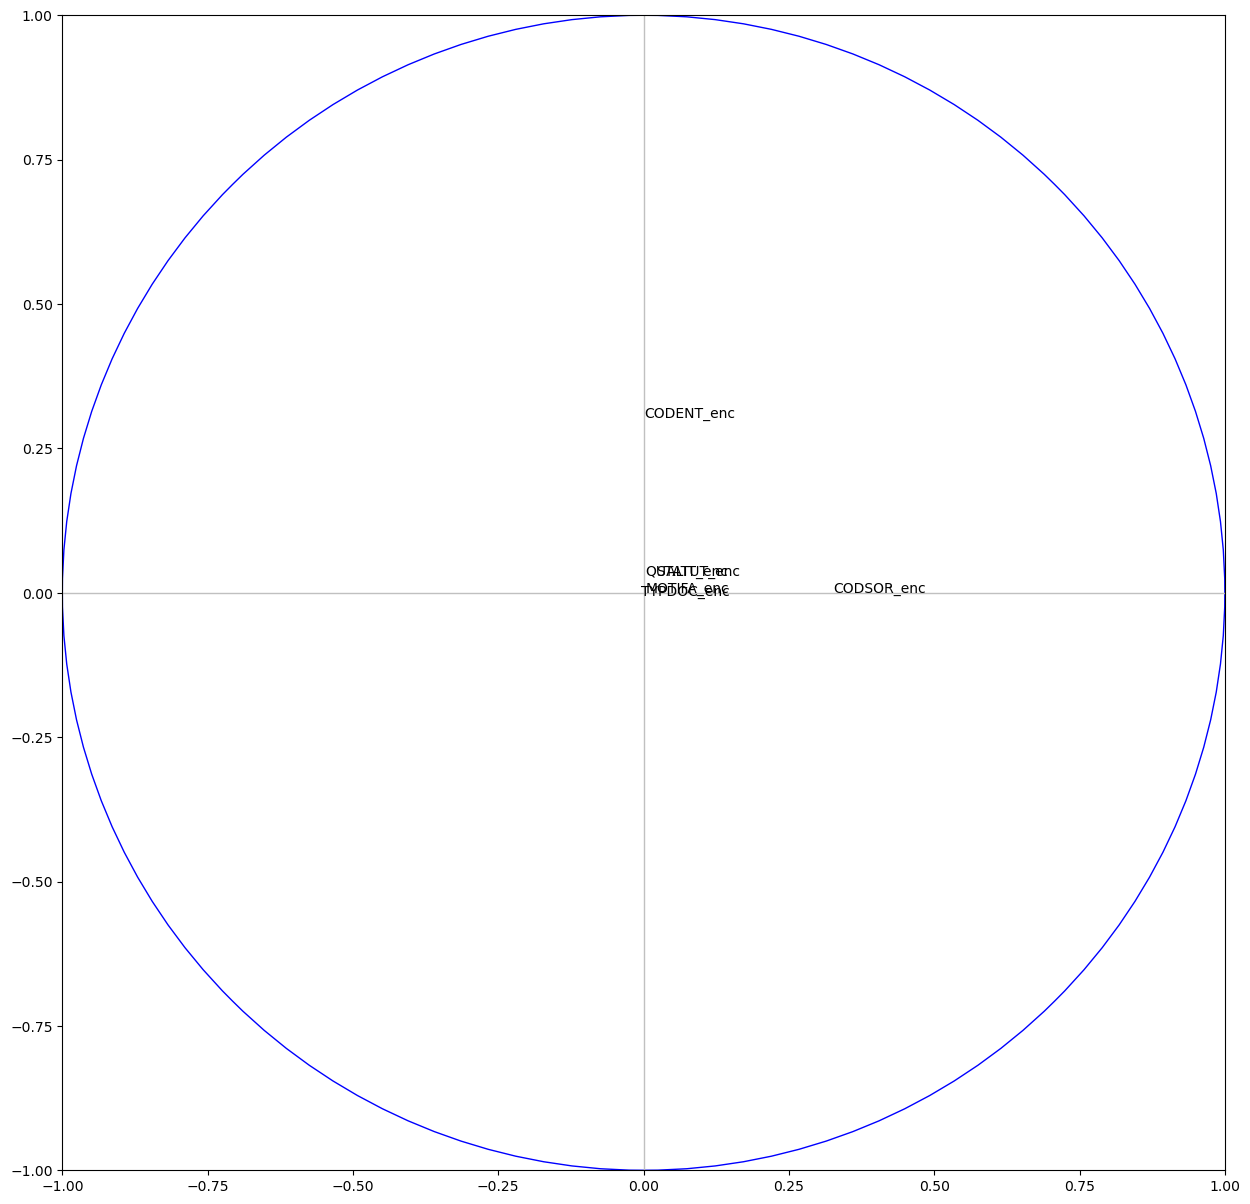

In [74]:
fig,axes = plt.subplots(figsize=(15,15))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

'''
# Annotating axes with arrows
for j in range(p): 
    plt.annotate('', xy=(corvar[j,0], corvar[j,1]), xytext=(0, 0),
                 arrowprops=dict(facecolor='grey', shrink=0.05))
'''
# Annotating axes
for j in range(p): 
    plt.annotate(df1.columns[j], (corvar[j,0],corvar[j,1]) )
    
# plotting axes & cercle
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

circle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(circle)
#plt.savefig('Corr_Circle_Ghost_1.png')


plt.show()

### df3

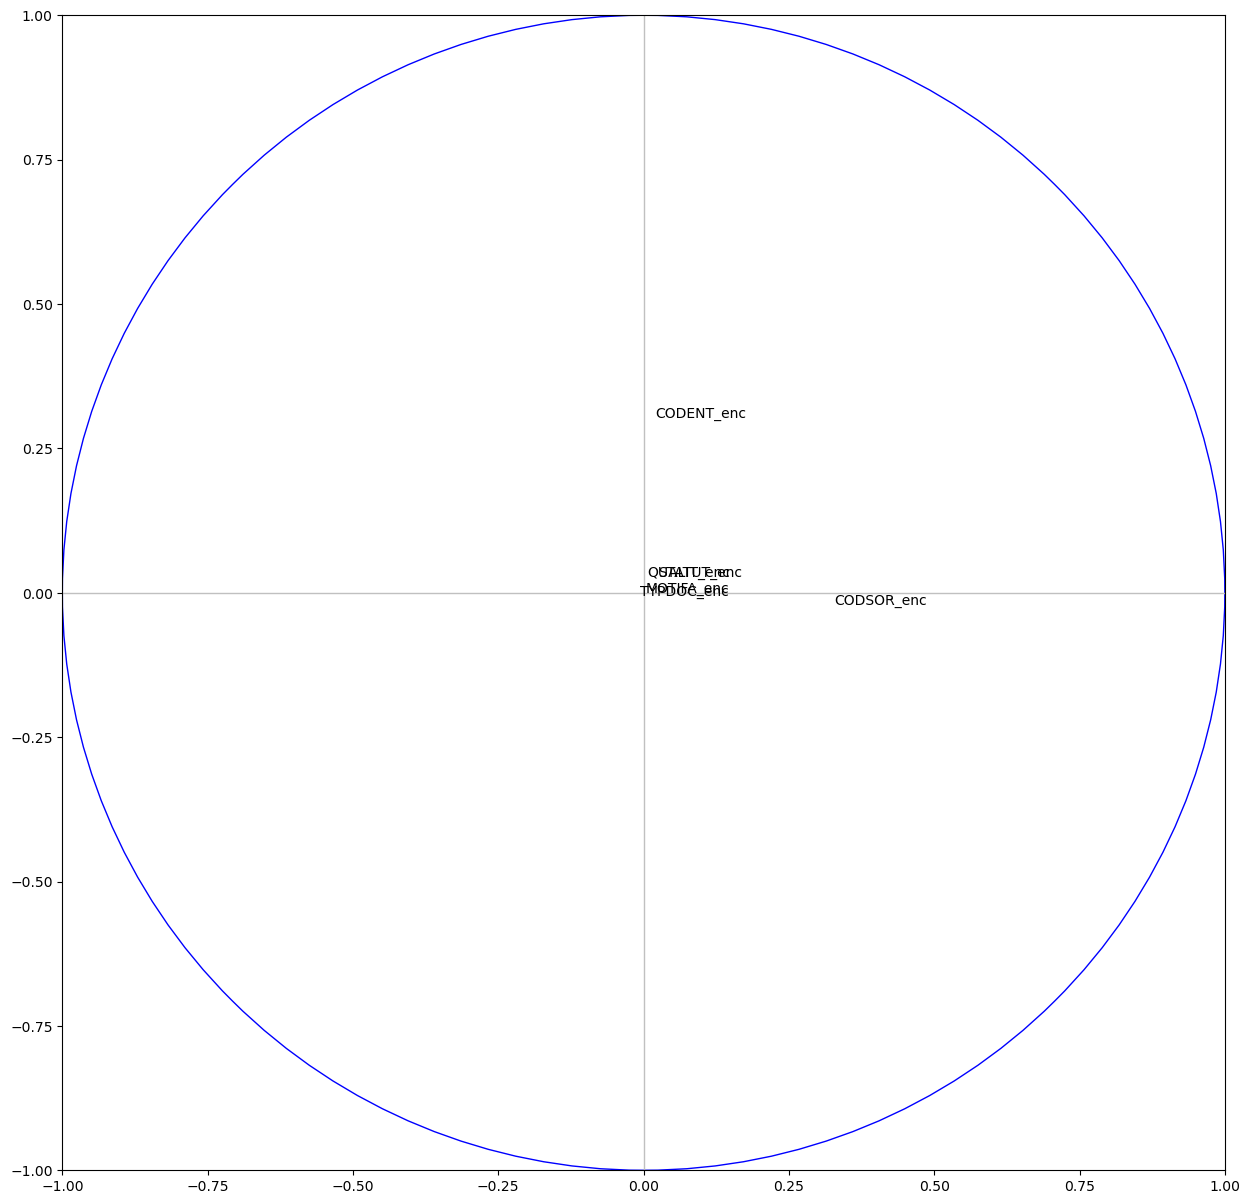

In [75]:
fig,axes = plt.subplots(figsize=(15,15))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

'''
# Annotating axes with arrows
for j in range(p): 
    plt.annotate('', xy=(corvar_3[j,0], corvar_3[j,1]), xytext=(0, 0),
                 arrowprops=dict(facecolor='grey', shrink=0.05))
'''
# Annotating axes
for j in range(p): 
    plt.annotate(df3.columns[j], (corvar_3[j,0],corvar_3[j,1]) )
    
# plotting axes & cercle
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

circle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(circle)
#plt.savefig('Corr_Circle_Ghost_3.png')

plt.show()

In [ ]:
list_en

### Interpretation
Axes related : 
- CODSOR_enc and CODENT_enc represent the y axis (F2)
- NMLSP2 represents the x axis (F1)

Variables related : 
-  CODSOR_enc and CODENT_enc are negatively correlated
-  STATUT_enc and CODENT_enc are highly positevly correlated
-  NMLSP2 & STATUT are highly negatively correlated
-  TYPDOC_enc, MOTIFA_enc, and QUALIT_enc are superposed, and they're the closest to NLMSP2.
-  NMLSP2 & CODSOR_enc are highly decorrelated

## ___________________________ ___ _______________________________ ___ _______________________
### Conclusion to draw regarding the data :
e_CODSOR = { '3' : 3, '4' : 2, '0' : 1}

e_CODENT = { '2' : 3, '3' : 2, '1' : 1}

 **Possible unnatural Scenarios Regarding CODSOR & CODENT** :
- (CODENT=2 ,CODSOR=3) ;
- (CODENT=1 ,CODSOR=0)
----------------------------------------

e_CODENT = { '2' : 3, '3' : 2, '1' : 1}

e_STATUT = { '2' : 3, '3' : 2, '0' : 1}

**Possible unnatural Regarding STATUT & CODENT** :
- (CODENT=2 ,STATUT=0)
- (CODENT=1 ,STATUT=2)
----------------------------------------------------------------------------------------------
NMLSP2 values have a maximum of '22210984' and mostt of them vary in that range.

e_STATUT = { '2' : 3, '3' : 2, '0' : 1}

**Possible unnatural Regarding STATUT & NMLSP2** :
- (STATUT =2,  NMLSP2=22210997)
- (STATUT=3 , NMLSP2=22210987)
----------------------------------------------------------------------------------------------
e_QUALIT = { '3' : 3, '1' : 2, '2' : 1}
==> 2 : Mme - 1 : Mr - 3 : Mlle 

e_MOTIFA = { 'CPN' : 0, 'MAN' : 1, 'CSS' : 2, 'CSO' : 3, 'MAT' : 4, 'ABS' : 5, 'MAB' : 6, 'MAP' : 7, 'ATR' : 8, '999' : 9 }

e_TYPDOC = { 'DOC11' : 1, 'DOC13' : 2, 'DOC02' : 3, 'DOC01' : 4, 'DOC08' : 5, 'DOC03' : 6, 'DOC04' : 7,  'DOC05' : 8, 'DOC06' : 9,'DOC07' : 10, 
             'DOC12' : 11, 'DOC17' : 12, 'DOC16' : 13, 'DOC15' : 14, 'DOC14' : 15, 'DOC10' : 16, 'DOC09' : 17, 'DOC32' : 18, 'DOC33' : 19,
              'DOC20' : 20, 'DOC39' : 21, 'DOC42' : 22, 'DOC45' : 23, 'DOC44' : 24, 'DOC37' : 25, 'DOC36' : 26, 'DOC35' : 27 }

- **Possible unnatural Regarding TYPDOC , MOTIFA & QUALIT** :
- (TYPDOC=DOC07 , MOTIFA=CPN , QUALIT=3 )
- (TYPDOC=DOC17 , MOTIFA=MAN , QUALIT=1 )
- (TYPDOC=DOC32 , MOTIFA=CSS , QUALIT=2 )

- (TYPDOC=DOC11 , MOTIFA=CSO , QUALIT=1 )
- (TYPDOC=DOC13 , MOTIFA=MAT , QUALIT=2 )
- (TYPDOC=DOC06 , MOTIFA=ABS , QUALIT=3 )
----------------------------------------------------------------------------------------------


## Representation Quality of variables

In [77]:
cos2var = corvar**2
pd.DataFrame({'id':df1.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1], 'COS2_3':cos2var[:,2],
              'COS2_4':cos2var[:,3],'COS2_5':cos2var[:,4],'COS2_6':cos2var[:,5],'COS2_7':cos2var[:,6],
             'COS2_8':cos2var[:,7]
             })

,id,COS2_1,COS2_2,COS2_3,COS2_4,COS2_5,COS2_6,COS2_7,COS2_8
0,MOTIFA_enc,1.693351e-05,5.234707e-07,1.602622e-06,1.298317e-05,2.621632e-08,3.651047e-04,4.935349e-03,1.892868e-05
1,TYPDOC_enc,1.939198e-05,2.306936e-05,1.921456e-05,1.567387e-04,4.209942e-02,2.091578e-10,1.192855e-08,1.054660e-10
2,CODSOR_enc,1.060718e-01,8.725232e-08,2.480990e-06,2.290438e-04,6.432777e-06,2.339481e-03,8.720400e-05,2.549135e-11
3,CODENT_enc,1.262718e-06,9.200060e-02,3.128542e-04,7.554623e-04,1.771092e-05,1.334120e-06,1.068897e-07,2.687741e-09
4,QUALIT_enc,1.263705e-05,8.336490e-04,5.945098e-02,2.628201e-03,2.169099e-06,1.898823e-09,3.064109e-08,4.377364e-08
5,STATUT_enc,4.892940e-04,9.077847e-04,3.170050e-03,5.252548e-02,1.179885e-04,9.239662e-06,3.773890e-07,2.193082e-09
6,CONSOM_DUR_int,4.016315e-07,1.306806e-07,2.999127e-06,5.510275e-08,9.210075e-10,7.007995e-06,9.339355e-05,9.996068e-04
7,SEN_GRP_DUR_int,5.699919e-02,1.890628e-05,2.850021e-07,1.109309e-06,1.655328e-06,4.345737e-03,1.938123e-04,8.225471e-11


## Contributions

In [78]:
ctrvar = cos2var

for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]

In [79]:
'''
pd.DataFrame({'id':df1.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1],'CTR_3':ctrvar[:,2],
              'CTR_4':ctrvar[:,3],'CTR_5':ctrvar[:,4],'CTR_6':ctrvar[:,5],'CTR_7':ctrvar[:,6],
             'CTR_8':ctrvar[:,7],'CTR_9':ctrvar[:,8],'CTR_10':ctrvar[:,9],'CTR_11':ctrvar[:,10]
             })
'''
pd.DataFrame({'id':df1.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]})

,id,CTR_1,CTR_2
0,MOTIFA_enc,0.000103,5.581618e-06
1,TYPDOC_enc,0.000119,2.459820e-04
2,CODSOR_enc,0.648318,9.303466e-07
3,CODENT_enc,0.000008,9.809761e-01
4,QUALIT_enc,0.000077,8.888961e-03
5,STATUT_enc,0.002991,9.679449e-03
6,CONSOM_DUR_int,0.000002,1.393410e-06
7,SEN_GRP_DUR_int,0.348382,2.015923e-04


## T-SNE

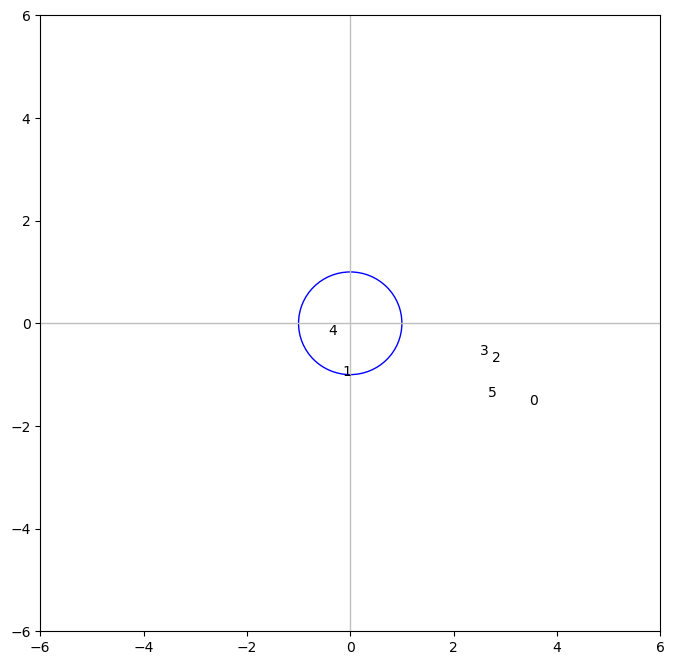

In [80]:
coord = PCA.fit_transform(data_cr)

fig,axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

for j in range(p): 
    plt.annotate(df1.index[j], (coord[j,0],coord[j,1]) )
    
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

circle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(circle)

plt.show()